In [74]:

import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image

from tensorflow.keras import Input, initializers, Model
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K


from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy


In [71]:
_proj_dir = '/content/drive/My Drive/reflect_gan/'
_save_dir = '/tmp/'
_chairs_dir = _proj_dir + 'datasets/chairs/'
_img_dirs = [('','reflect'), ('object/','object'), ('depth/','depth')]
_prep_dir = _proj_dir + 'prep/'
_specs = [('train', 0.7), ('valid', 0.2), ('test', 0.1)]
_shuffle_size = 100
_batch_size = 1
_h = 256
_w = 128
_epoch_per_ckpt = 100
_epoch_count = 1000

In [65]:
def split_half(img):
    return [img[:, :128], img[:, 128:]]

def get_data(facade_path=''):
    train_img = list(os.walk('facades/train'))[0][2]
    test_img = list(os.walk('facades/test'))[0][2]
    val_img = list(os.walk('facades/val'))[0][2]

    train = [split_half(np.array(Image.open('facades/train/' + i))) for i in train_img]
    test = [split_half(np.array(Image.open('facades/test/' + i))) for i in test_img]
    val = [split_half(np.array(Image.open('facades/val/' + i))) for i in val_img]

    return np.array(train), np.array(test), np.array(val)


train, test, val = get_data()

# Data visualization

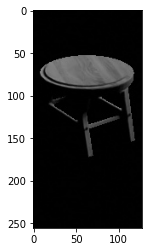

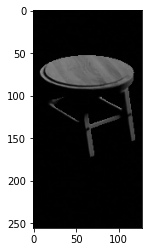

In [69]:
for i in range(2):
    plt.imshow(train[random.randint(0, len(train)-1)][0])
    plt.show()

In [104]:
def reflect_net():

    img = Input([_h, _w, 3])

    # Object detection
    l1 = L.Reshape([_h, _w, 3])(img)
    l2 = L.Conv2D(16, [3,3], padding='same', activation='relu', use_bias=True)(l1)
    l3 = L.Conv2D(16, [3,3], padding='same', activation='relu', use_bias=True)(l2)
    l4 = L.Conv2D(3, [3,3], padding='same', activation='relu', use_bias=True)(l3)
    

    return Model(inputs=img, outputs=l4)

reflect_net().summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 256, 128, 3)]     0         
_________________________________________________________________
reshape_19 (Reshape)         (None, 256, 128, 3)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 256, 128, 16)      448       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 256, 128, 16)      2320      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 256, 128, 3)       435       
Total params: 3,203
Trainable params: 3,203
Non-trainable params: 0
_________________________________________________________________


In [121]:

mse = tf.keras.losses.MeanSquaredError()
optimizer = SGD(lr=0.01, clipvalue=0.5)

model = reflect_net()

In [125]:
@tf.function
def train_step(obj_imgs, target_imgs, epoch):
    with tf.GradientTape() as gen_tape:
        prediction = model(obj_imgs, training=True)
        loss = mse(y_true=target_imgs, y_pred=prediction)
        gradients = gen_tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        print (loss)

def fit(train_ds, epochs, test_ds):
    for epoch in range(epochs):
        start = time.time()

        # Train
        for i, (x, y) in enumerate(train_ds):
            xx = x.reshape((-1, 256, 128, 3))
            yy = y.reshape((-1, 256, 128, 3))
            train_step(xx, yy, epoch)

In [126]:
fit(train, 100, test)

Tensor("mean_squared_error/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("mean_squared_error/weighted_loss/value:0", shape=(), dtype=float32)
..
Time taken for epoch 1 is 0.6863846778869629 sec

Tensor("mean_squared_error/weighted_loss/value:0", shape=(), dtype=float32)
..
Time taken for epoch 2 is 0.5302333831787109 sec

Tensor("mean_squared_error/weighted_loss/value:0", shape=(), dtype=float32)
..
Time taken for epoch 3 is 0.5269405841827393 sec

Tensor("mean_squared_error/weighted_loss/value:0", shape=(), dtype=float32)
..
Time taken for epoch 4 is 0.5432360172271729 sec

Tensor("mean_squared_error/weighted_loss/value:0", shape=(), dtype=float32)
..
Time taken for epoch 5 is 0.5187513828277588 sec

Tensor("mean_squared_error/weighted_loss/value:0", shape=(), dtype=float32)
..
Time taken for epoch 6 is 0.5477766990661621 sec

Tensor("mean_squared_error/weighted_loss/value:0", shape=(), dtype=float32)
..
Time taken for epoch 7 is 0.5373489856719971 sec

Tensor("mean_squared_

In [129]:
p = keras_model.predict(train[0][0].reshape((-1, 256, 128, 3)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


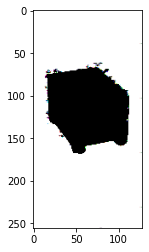

In [130]:
plt.imshow(p[0])